In [9]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_104_10_30orig.mpt'])
bad_inds = [0,2,3]
mpt.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,0.000019,0.000350,0.000230,1.0,12,0.000628,0.000001,-4.540541e-09,0.000425,0.001044,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,891246.69,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-0.012680,0.013524,0.012313,1.0,9,0.000059,0.000004,-1.749967e-06,0.001066,-0.021623,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,794332.69,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12,0.001122,0.000002,-3.754701e-06,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12,0.002918,0.000004,-3.727839e-06,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12,0.005477,0.000007,-3.718076e-06,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06


In [10]:
mpt.df[0]

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1.000019e+06,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,1.927563e-05,0.000350,0.000230,1.0,12,0.000628,1.118921e-06,-4.540541e-09,0.000425,1.043550e-03,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,8.912467e+05,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-1.267998e-02,0.013524,0.012313,1.0,9,0.000059,4.266311e-06,-1.749967e-06,0.001066,-2.162321e-02,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,7.943327e+05,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,1.141136e-05,0.000383,0.000246,1.0,12,0.001122,1.717813e-06,-3.754701e-06,0.000585,9.149641e-04,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,7.079498e+05,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,1.638726e-05,0.000397,0.000257,1.0,12,0.002918,4.148486e-06,-3.727839e-06,0.000666,8.447835e-04,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,6.309568e+05,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,7.442054e-06,0.000408,0.000267,1.0,12,0.005477,7.161545e-06,-3.718076e-06,0.000746,7.692953e-04,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06
5,5.623422e+05,482.347930,677.758670,831.875180,-54.561264,5.888485,-0.002128,3.015930e-05,0.000418,0.000277,1.0,12,0.008861,1.065167e-05,-3.701802e-06,0.000505,6.970182e-04,0.000979,0.001202,54.561264,1.627464e-08,NaN,3.533301e+06
6,5.012062e+05,518.721500,741.287290,904.753480,-55.017300,6.485476,-0.002174,5.802225e-06,0.000428,0.000288,1.0,12,0.013163,1.454858e-05,-3.691385e-06,0.000585,6.336854e-04,0.000906,0.001105,55.017300,1.041643e-08,NaN,3.149171e+06
7,4.466857e+05,557.460210,810.794620,983.946040,-55.489613,7.081485,-0.002206,-7.948797e-07,0.000439,0.000298,1.0,12,0.018440,1.874111e-05,-3.695002e-06,0.000505,5.757995e-04,0.000837,0.001016,55.489613,-3.616672e-09,NaN,2.806609e+06
8,3.981035e+05,601.246700,887.569640,1072.043600,-55.885979,7.677480,-0.002202,5.224735e-06,0.000450,0.000309,1.0,12,0.024799,2.313281e-05,-3.661579e-06,0.000425,5.231519e-04,0.000772,0.000933,55.885979,3.342234e-08,NaN,2.501358e+06
9,3.548100e+05,649.861760,966.728150,1164.853500,-56.089901,8.273485,-0.002213,1.116973e-05,0.000464,0.000320,1.0,12,0.032317,2.774382e-05,-3.672760e-06,0.000746,4.789369e-04,0.000712,0.000858,56.089901,-1.118011e-08,NaN,2.229337e+06


No handles with labels found to put in legend.


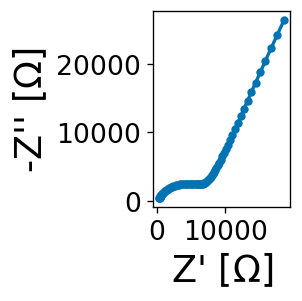

In [2]:
mpt.mpt_plot()

In [29]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_104_1_30_trimmed.mpt,239.505055,1398.063635,0.91046,95238.228566,3.933243e-09,5241.314751,0.766801,20831.759901,2.274630e-08,3.954920e-07,0.734353


In [25]:
mpt.low_error

172109.43593206568

No handles with labels found to put in legend.


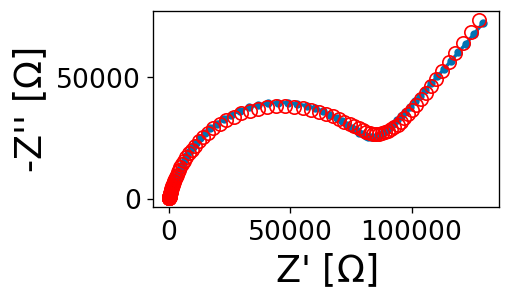

In [26]:
mpt.mpt_plot(fitting = 'on')

In [3]:
mpt.guesser(circuit = 'R-RQ-Q')

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_Q,fit_n2
0,DE_104_1_30_trimmed.mpt,181.314956,6597.988141,0.749495,31151.715589,1.638755e-08,4.055879e-07,0.730068


No handles with labels found to put in legend.


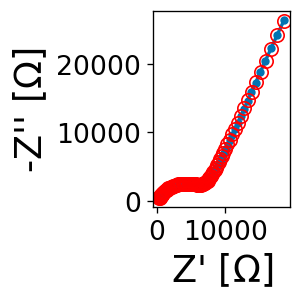

In [4]:
mpt.mpt_plot(fitting = 'on')

In [7]:
mpt.df_raw

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1.000019e+06,380.53094,431.64484,575.43121,-48.601131,1.607490,-0.070666,-3.074794e-05,0.000369,0.000207,1.0,12,0.000914,1.587914e-06,-2.271957e-08,-0.000058,0.001149,0.001304,0.001738,48.601131,-2.271957e-08,NaN,6.283302e+06
1,8.912467e+05,399.59314,454.89511,605.47852,-48.702984,2.204497,-0.070132,-2.451416e-05,0.000393,0.000222,1.0,12,0.001570,2.593358e-06,-2.124911e-08,0.000022,0.001090,0.001241,0.001652,48.702984,1.470459e-09,NaN,5.599868e+06
2,7.943327e+05,428.44955,494.39752,654.21552,-49.087490,2.800481,-0.069679,-1.910157e-05,0.000405,0.000231,1.0,12,0.001983,3.031703e-06,-3.798305e-08,-0.000299,0.001001,0.001155,0.001529,49.087490,-1.673393e-08,NaN,4.990939e+06
3,7.079498e+05,458.40363,534.23718,703.94830,-49.368668,3.395492,-0.069249,-1.639516e-05,0.000421,0.000242,1.0,12,0.001806,2.566079e-06,-7.746774e-08,-0.000299,0.000925,0.001078,0.001421,49.368668,-3.948469e-08,NaN,4.448180e+06
4,6.309568e+05,489.62445,583.78113,761.92682,-50.013023,3.990478,-0.068865,-2.973975e-05,0.000432,0.000254,1.0,12,0.000749,9.835666e-07,-6.853105e-08,0.000343,0.000843,0.001006,0.001312,50.013023,8.936687e-09,NaN,3.964419e+06
5,5.623422e+05,516.84955,636.80847,820.15759,-50.936359,4.585482,-0.068524,-2.861986e-05,0.000444,0.000268,1.0,12,0.001430,1.743561e-06,-4.114404e-08,-0.000219,0.000768,0.000947,0.001219,50.936359,2.738701e-08,NaN,3.533301e+06
6,5.012062e+05,555.80182,701.72040,895.16876,-51.618805,5.182494,-0.068229,-1.497653e-05,0.000453,0.000278,1.0,12,0.004882,5.453896e-06,-3.662197e-08,0.000022,0.000694,0.000876,0.001117,51.618805,4.522074e-09,NaN,3.149171e+06
7,4.466857e+05,593.78461,765.88135,969.09979,-52.213730,5.777494,-0.067977,-2.096756e-05,0.000465,0.000291,1.0,12,0.009660,9.968257e-06,1.574141e-08,-0.000539,0.000632,0.000816,0.001032,52.213730,5.236338e-08,NaN,2.806609e+06
8,3.981035e+05,640.89532,833.97845,1051.79220,-52.458462,6.373492,-0.067809,-3.216565e-05,0.000479,0.000301,1.0,12,0.015845,1.506445e-05,7.072247e-08,0.000022,0.000579,0.000754,0.000951,52.458462,5.498107e-08,NaN,2.501358e+06
9,3.548100e+05,690.04462,909.20007,1141.40540,-52.803032,6.969491,-0.067684,-2.822745e-05,0.000493,0.000313,1.0,12,0.023434,2.053064e-05,1.464957e-08,0.000182,0.000530,0.000698,0.000876,52.803032,-5.607290e-08,NaN,2.229337e+06
